# Lesson 4 - Exploratory Data Analysis (EDA)

Use this exercise to see how cleaning and engineering features not only “debug” your data, but also reveal deeper trends that might influence future design decisions for your platform.

**Create your OWN DATASET**

Your codes must perform the following:


1. Convert timestamp to datetime
    *  and sort the data
    *  Identify and handle missing values in error_flag
    *  Create these visualizations:
*  Boxplot of time_spent
*  Count plot of user action
*  Line plot showing error_flag trends per day

*Bonus Tasks (Optional):*
*  Highlight the day with the highest average error rate.
*  Suggest possible reasons behind spikes in error or unusual time_spent values.
*   Group data by user_id and compare behavior patterns.

-----Sensor Data-----
            timestamp  user_id  action  time_spent  error_flag
0 2025-06-01 10:00:00      101    view          45         1.0
1 2025-06-01 10:05:00      102  submit         200         1.0
2 2025-06-01 10:10:00      101   click         100         0.0
3 2025-06-02 11:00:00      103    view          50         NaN
4 2025-06-02 11:05:00      102    view         400         1.0
-----Missing Values in Sensor Data-----
timestamp     0
user_id       0
action        0
time_spent    0
error_flag    4
dtype: int64


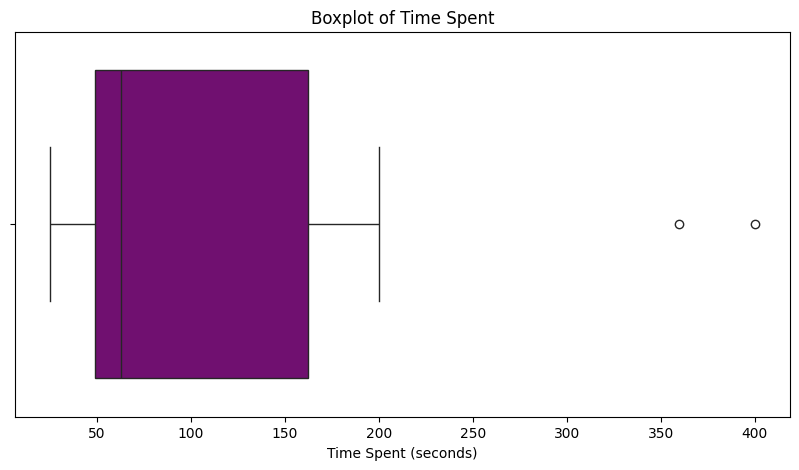

C:\Users\juliana\AppData\Local\Temp\ipykernel_18636\699373789.py:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='action', data=df_sensor, palette='Set2')


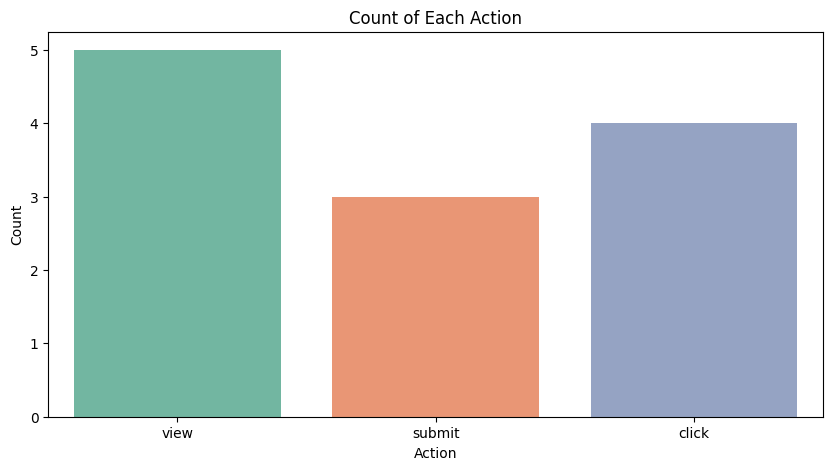


Day with Highest Error Rate: 2025-06-01 (0.67)


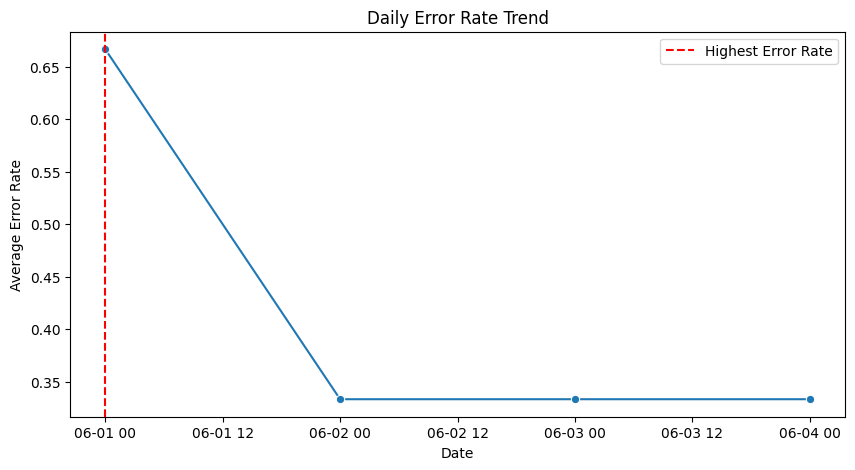


-----Potential reasons for spikes in error or unusual time_spent values-----
Possible reasons for high time_spent:
- User 102 performing action 'view' at 2025-06-02 11:05:00: Could indicate complex tasks, system slowness, or user distraction.
- User 101 performing action 'view' at 2025-06-04 13:05:00: Could indicate complex tasks, system slowness, or user distraction.

Possible reasons for errors:
- Errors might be related to specific actions or user interactions.

-----User Behavior Patterns-----
   user_id                         action_counts  avg_time_spent  \
0      101               {'view': 2, 'click': 2}      135.000000   
1      102  {'view': 2, 'click': 2, 'submit': 1}      166.000000   
2      103              {'submit': 2, 'view': 1}       58.333333   

   total_time_spent  error_rate  
0               540    0.500000  
1               830    0.400000  
2               175    0.333333  


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Simulate a dataset
data = {
    'timestamp': ['2025-06-01 10:00:00', '2025-06-01 10:05:00', '2025-06-01 10:10:00',
                  '2025-06-02 11:00:00', '2025-06-02 11:05:00', '2025-06-02 11:10:00',
                  '2025-06-03 12:00:00', '2025-06-03 12:05:00', '2025-06-03 12:10:00',
                  '2025-06-04 13:00:00', '2025-06-04 13:05:00', '2025-06-04 13:10:00'],
    'user_id': [101, 102, 101, 103, 102, 101, 102, 103, 102, 103, 101, 102],
    'action': ['view', 'submit', 'click', 'view', 'view', 'click', 'view', 'submit', 'click', 'submit', 'view', 'click'],
    'time_spent': [45, 200, 100, 50, 400, 35, 150, 70, 25, 55, 360, 55],
    'error_flag': [1, 1, 0, np.nan, 1, np.nan, 0, 1, np.nan, 0, 1, np.nan]
}

df_sensor = pd.DataFrame(data)

# Convert 'timestamp' to datetime and sort
df_sensor['timestamp'] = pd.to_datetime(df_sensor['timestamp'])
df_sensor = df_sensor.sort_values(by='timestamp')
print("-----Sensor Data-----")
print(df_sensor.head())

# Check missing values
print("-----Missing Values in Sensor Data-----")
print(df_sensor.isnull().sum())

# Handling missing values for 'error_flag' by filling missing with 0
df_sensor['error_flag'] = df_sensor['error_flag'].fillna(0)

# Plot distribution of 'time_spent'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_sensor['time_spent'], color='purple')
plt.title('Boxplot of Time Spent')
plt.xlabel('Time Spent (seconds)')
plt.show()

# Bar plot for each type of 'action'
plt.figure(figsize=(10, 5))
sns.countplot(x='action', data=df_sensor, palette='Set2')
plt.title('Count of Each Action')
plt.xlabel('Action')
plt.ylabel('Count')
plt.show()

# Feature Engineering: error rate per day
df_sensor['date'] = df_sensor['timestamp'].dt.date
error_rate = df_sensor.groupby('date')['error_flag'].mean().reset_index()

# Highlight the day with the highest error rate
max_error_day = error_rate.loc[error_rate['error_flag'].idxmax()]
print(f"\nDay with Highest Error Rate: {max_error_day['date']} ({max_error_day['error_flag']:.2f})")

# Line plot for error rate trend
plt.figure(figsize=(10, 5))
sns.lineplot(x='date', y='error_flag', data=error_rate, marker='o')
plt.axvline(pd.to_datetime(max_error_day['date']), color='red', linestyle='--', label='Highest Error Rate')
plt.title('Daily Error Rate Trend')
plt.xlabel('Date')
plt.ylabel('Average Error Rate')
plt.legend()
plt.show()

# Bonus Task 1: Suggest possible reasons behind spikes in error or unusual time_spent values
print("\n-----Potential reasons for spikes in error or unusual time_spent values-----")
# Identify outliers in time_spent
q1 = df_sensor['time_spent'].quantile(0.25)
q3 = df_sensor['time_spent'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
outliers = df_sensor[df_sensor['time_spent'] > upper_bound]

if not outliers.empty:
    print("Possible reasons for high time_spent:")
    for index, row in outliers.iterrows():
        print(f"- User {row['user_id']} performing action '{row['action']}' at {row['timestamp']}: Could indicate complex tasks, system slowness, or user distraction.")
else:
    print("No significant outliers in time_spent detected based on IQR method.")

# Analyze errors
errors = df_sensor[df_sensor['error_flag'] == 1]
if not errors.empty:
    print("\nPossible reasons for errors:")
    # You could add more specific analysis based on action or other features if available
    print("- Errors might be related to specific actions or user interactions.")
else:
    print("\nNo errors recorded in the dataset.")


# Bonus Task 2: Group data by user_id and compare behavior patterns
print("\n-----User Behavior Patterns-----")
user_patterns = df_sensor.groupby('user_id').agg(
    action_counts=('action', lambda x: x.value_counts().to_dict()),
    avg_time_spent=('time_spent', 'mean'),
    total_time_spent=('time_spent', 'sum'),
    error_rate=('error_flag', 'mean')
).reset_index()

print(user_patterns)